## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

ModuleNotFoundError: No module named 'seaborn'

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")  

print(df.head())  
print(df.describe())  
print(df.dtypes)  
print(df.isnull().sum())  
print(f"Dataset shape: {df.shape}")


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [6]:
import pandas as pd
df = pd.read_csv("titanic.csv")  
print(df.isnull().sum())  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Можливо, не всім пасажирам було присвоєно номер каюти, або вони подорожували в загальних приміщеннях.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



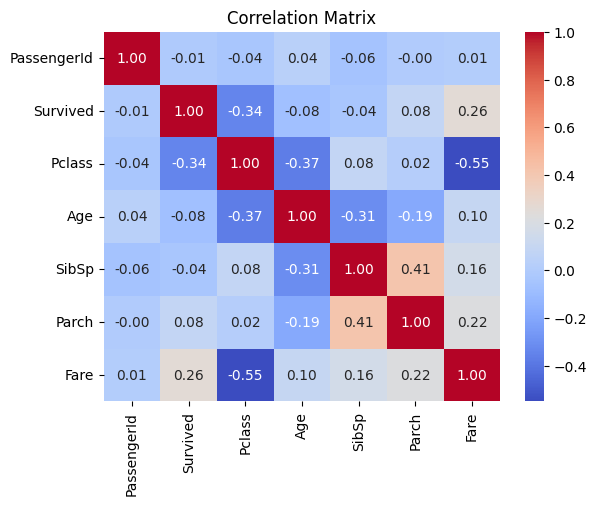

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv").select_dtypes("number")  

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  
plt.title("Correlation Matrix")
plt.show()


Дорожчий квиток злегка підвищував шанс вижити.
Age та Survived мають незначну кореляцію (~ -0.08), тобто вік практично не впливав на виживання.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")  

df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median())) 

print(df.groupby(["Pclass", "Sex"])["Age"].median())  

print(df["Age"].isnull().sum())  

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
0



 Пропущені значення в Age я заповнив, там немає пропусків виводячи число 0

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





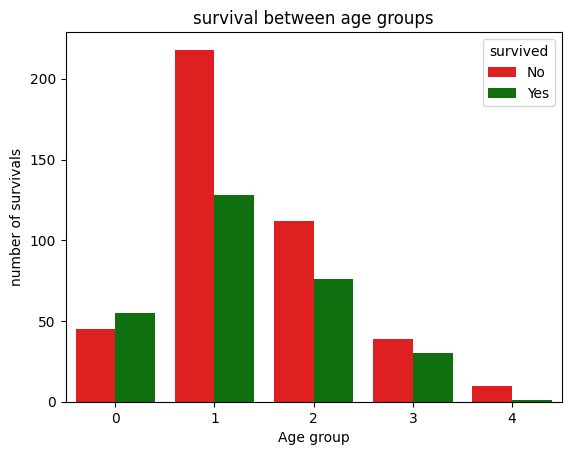

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")  
df["Age_bin"] = pd.cut(df["Age"], bins=[0, 16, 32, 48, 64, 80], labels=range(5))  

sns.countplot(data=df, x="Age_bin", hue="Survived", palette=["red", "green"])  
plt.xlabel("Age group")
plt.ylabel("number of survivals")
plt.title("survival between age groups")
plt.legend(title="survived", labels=["No", "Yes"])
plt.show()



Age group 0 (0-16 years old) → 52 survivors
Age group 1 (17-32 years old) → 138 survivors
Age group 2 (33-48 years old) → 64 survivors
Age group 3 (49-64 years old) → 27 survivors
Age group 4 (65-80 years old) → 5 survivors

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

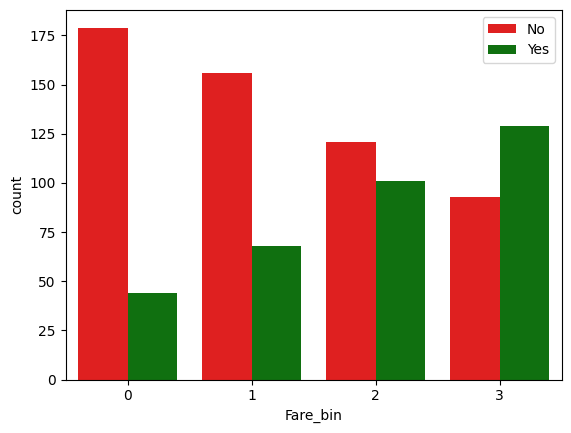

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df["Fare_bin"] = pd.qcut(df["Fare"], 4, labels=range(4))

sns.countplot(df, x="Fare_bin", hue="Survived", palette=["red", "green"])
plt.legend(["No", "Yes"])
plt.show()


Count це кількість пасажирів
від 0 до 3 це тип квитку, де 0 найдешевший а 3 найдорожчий
Тут чітко видно що чим дорожчий квиток тим більший шанс вижити

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

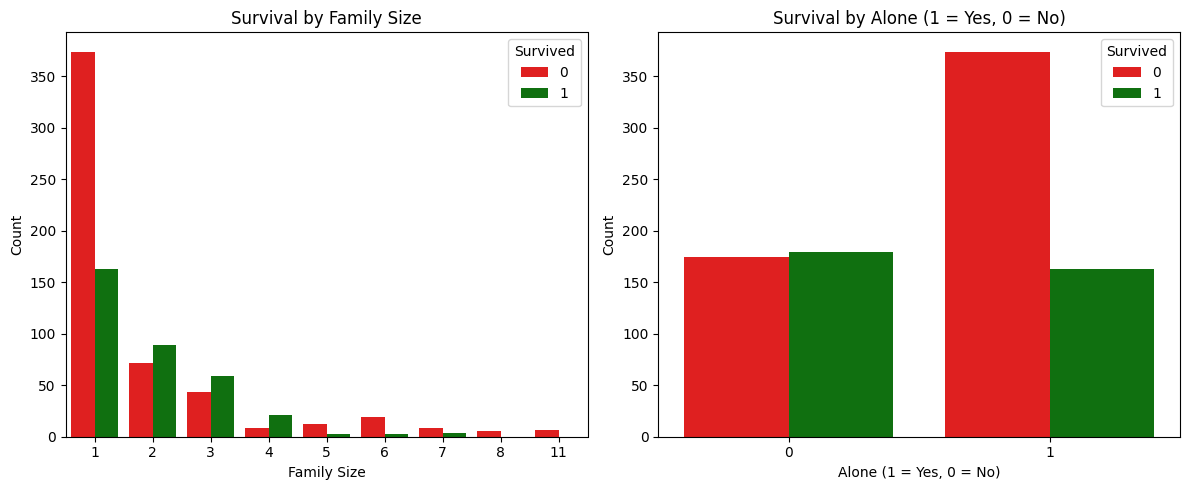

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df["Family_size"] = df["Parch"] + df["SibSp"] + 1
df["Alone"] = (df["Family_size"] == 1).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col, title in zip(axes, ["Family_size", "Alone"], ["Family Size", "Alone (1 = Yes, 0 = No)"]):
    sns.countplot(data=df, x=col, hue="Survived", palette=["red", "green"], ax=ax)
    ax.set_title(f"Survival by {title}")
    ax.set_xlabel(title)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


Family size це кількість людей в сім'ї 1 (520) 2 (180) 3 (100) 4(50) 5 (25) 6(15) 7(10)
Count к-сть пасажирів всього
-----------------------
0 це з сім'єю 0(340)
1 без сім'ї 1(520)

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [37]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
print(df.shape)


(891, 8)


 у датафреймі залишилося 891 записів  та 8 стовпців про кожного з них.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [41]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.")
df["Title"] = df["Title"].map({t: i for i, t in enumerate(df["Title"].unique())})

print(df[["Sex", "Embarked", "Title"]].head())


   Sex  Embarked  Title
0    0       0.0      0
1    1       1.0      1
2    1       0.0      2
3    1       0.0      1
4    0       0.0      0


embarked-адреса 
title- інформація з імені

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



C:\Users\Artur\AppData\Local\Temp\ipykernel_12576\761256500.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="pastel", ax=ax)
C:\Users\Artur\AppData\Local\Temp\ipykernel_12576\761256500.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="pastel", ax=ax)
C:\Users\Artur\AppData\Local\Temp\ipykernel_12576\761256500.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="pastel", ax=ax)
C:\Users\Artur\AppData\Local\Temp\ipykernel_12576\761256500.py:20: FutureWarning: 

Passing `p

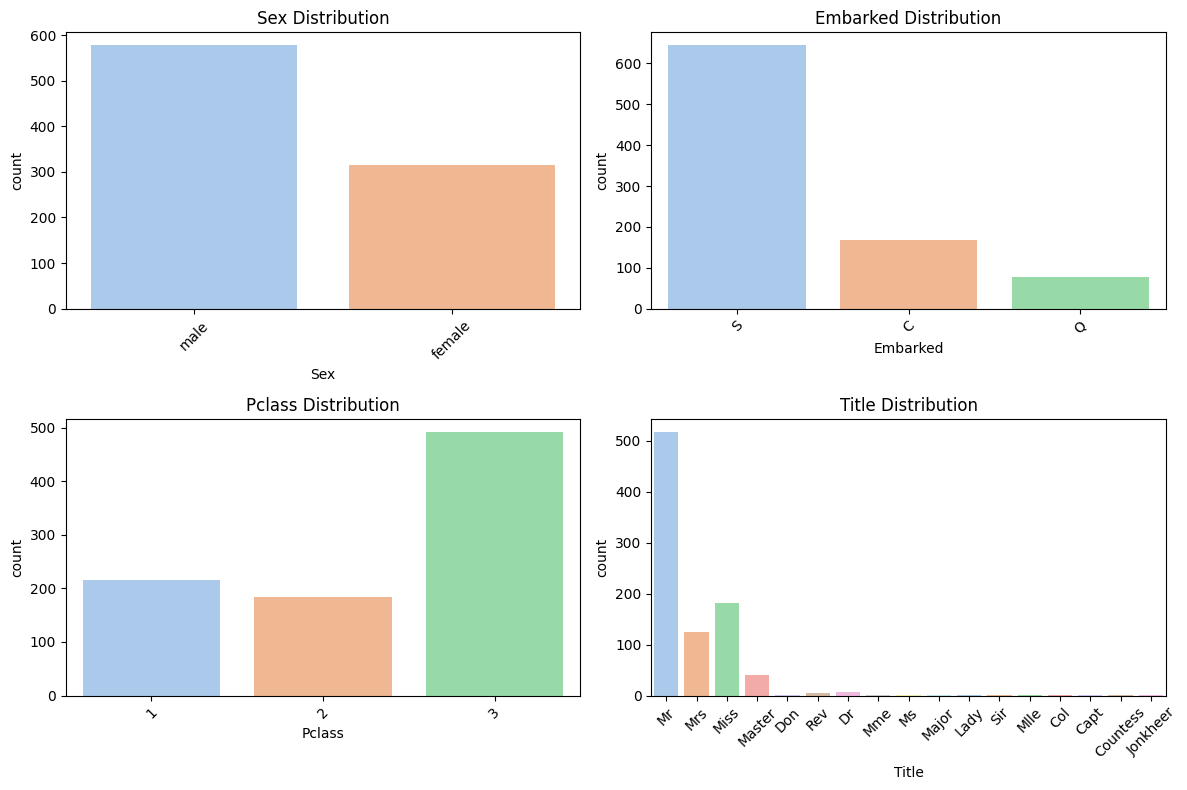

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("titanic.csv")

if "Title" not in df:
    df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.")

cat_cols = ["Sex", "Embarked", "Pclass", "Title"]

cat_cols = [col for col in cat_cols if col in df]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(df, x=col, palette="pastel", ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


У жінок та дітей був більший шанс на виживання через пріоритет порятунку


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

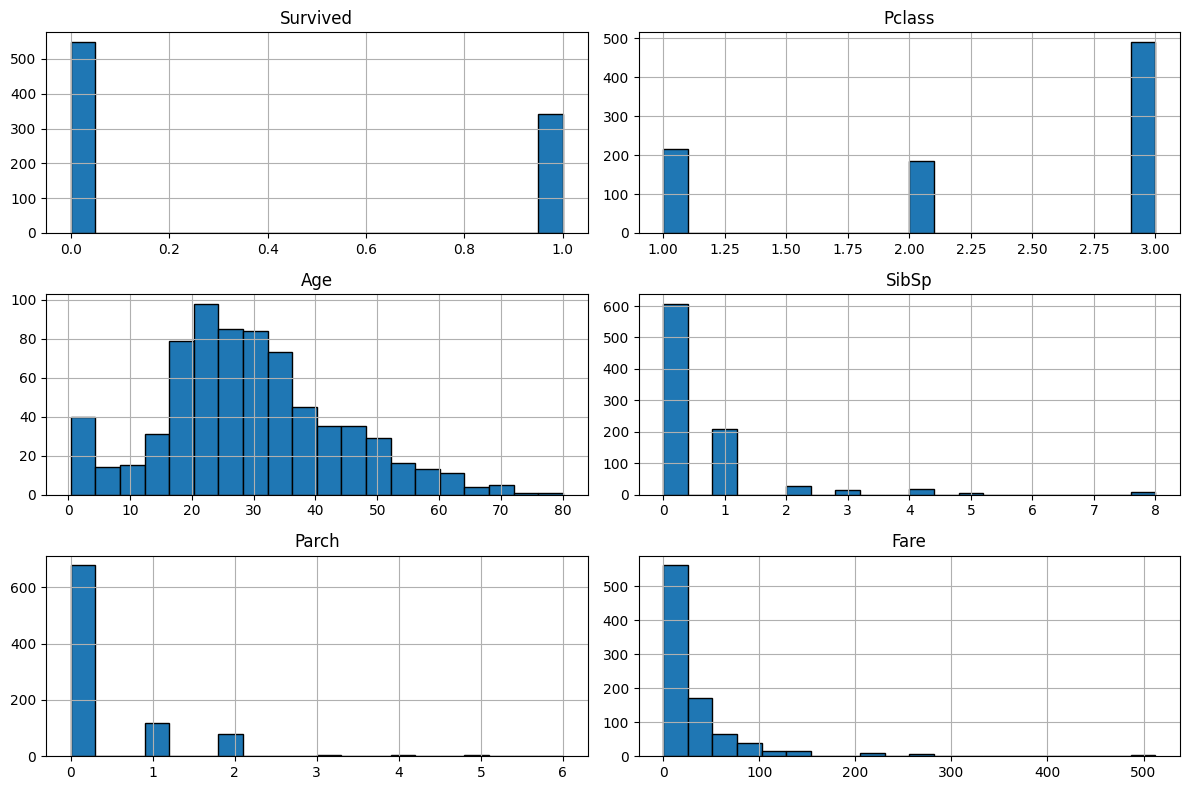

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols.remove("PassengerId")  

df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor="black")

plt.tight_layout()
plt.show()


Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

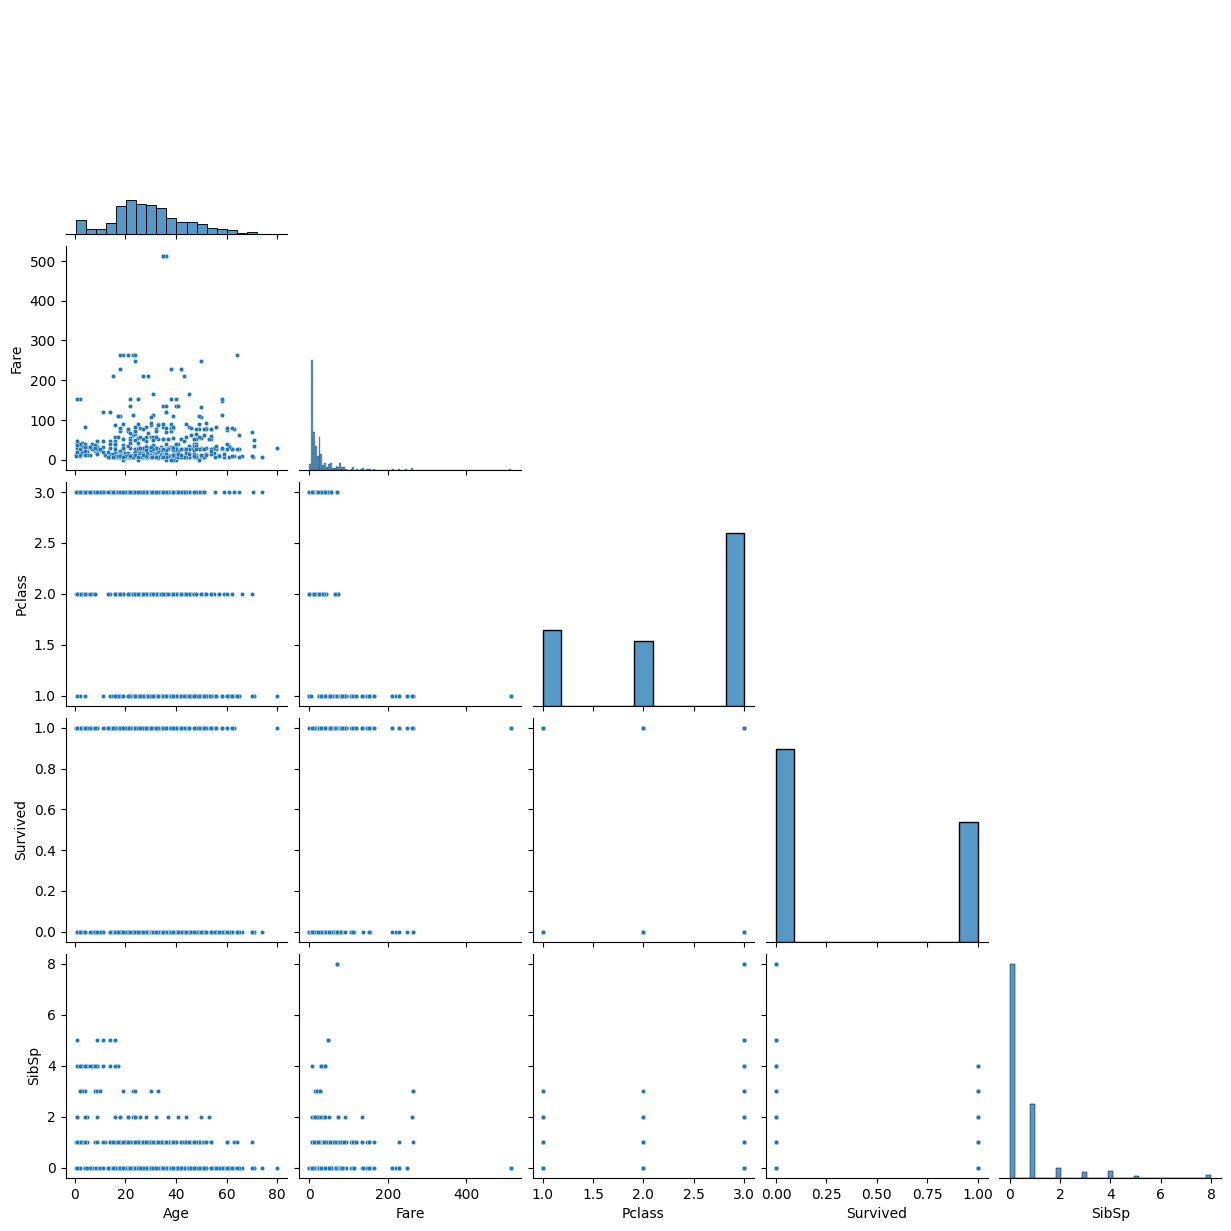

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

num_cols = ["Age", "Fare", "Pclass", "Survived", "SibSp"]

sns.pairplot(df[num_cols], diag_kind="hist", plot_kws={"s": 10}, corner=True)

plt.show()


Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.